In [189]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2

In [190]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.8.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [191]:
NUM_CLASSES = 17

IMAGE_SIZE = 120

DATASET_PATH = "../data/pokemon_per_type"

In [192]:
# Creating the model

DROPOUT = 0.3

model=Sequential()

model.add(Dense(4, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(DROPOUT))


model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(DROPOUT))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(DROPOUT))

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(DROPOUT))

model.add(Flatten())
model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(DROPOUT))


model.add(Dense(NUM_CLASSES, activation = 'softmax'))

In [193]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 120, 120, 4)       16        
                                                                 
 conv2d_139 (Conv2D)         (None, 118, 118, 32)      1184      
                                                                 
 batch_normalization_143 (Ba  (None, 118, 118, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_138 (MaxPooli  (None, 59, 59, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_114 (Dropout)       (None, 59, 59, 32)        0         
                                                                 
 conv2d_140 (Conv2D)         (None, 57, 57, 64)      

In [194]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [195]:
def to_lab(image):
    image = np.array(image)
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    return lab_image

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   rotation_range = 20,
                                   horizontal_flip = True,
                                  #  preprocessing_function = to_lab
                                )

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  # preprocessing_function = to_lab
                                )

batch_size = 16

training_set = train_datagen.flow_from_directory(DATASET_PATH + '/train', 
                                                    target_size = (IMAGE_SIZE, IMAGE_SIZE), 
                                                    batch_size = batch_size)
test_set = test_datagen.flow_from_directory(DATASET_PATH + '/val',
                                                target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = batch_size)

Found 725 images belonging to 17 classes.
Found 81 images belonging to 17 classes.


In [196]:
nb_epochs = 500
fitted_model = model.fit(training_set,
                        epochs = nb_epochs,
                        validation_data = test_set)

Epoch 1/500
46/46 [==============================] - 4s 54ms/step - loss: 8.8392 - accuracy: 0.0993 - val_loss: 5.7757 - val_accuracy: 0.0370
Epoch 2/500
46/46 [==============================] - 2s 43ms/step - loss: 3.1379 - accuracy: 0.1572 - val_loss: 12.8592 - val_accuracy: 0.0247
Epoch 3/500
46/46 [==============================] - 2s 43ms/step - loss: 2.7424 - accuracy: 0.1890 - val_loss: 14.8396 - val_accuracy: 0.0247
Epoch 4/500
46/46 [==============================] - 2s 42ms/step - loss: 2.6386 - accuracy: 0.2193 - val_loss: 13.6100 - val_accuracy: 0.0247
Epoch 5/500
46/46 [==============================] - 2s 43ms/step - loss: 2.5815 - accuracy: 0.1766 - val_loss: 11.0955 - val_accuracy: 0.0123
Epoch 6/500
46/46 [==============================] - 2s 47ms/step - loss: 2.5001 - accuracy: 0.2331 - val_loss: 19.9137 - val_accuracy: 0.0247
Epoch 7/500
46/46 [==============================] - 2s 44ms/step - loss: 2.4946 - accuracy: 0.2248 - val_loss: 18.0153 - val_accuracy: 0.0247


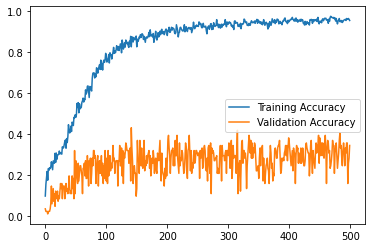

In [197]:
plt.figure()
plt.plot([i for i in range(nb_epochs)],fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot([i for i in range(nb_epochs)],fitted_model.history['val_accuracy'], label = "Validation Accuracy")
plt.legend()

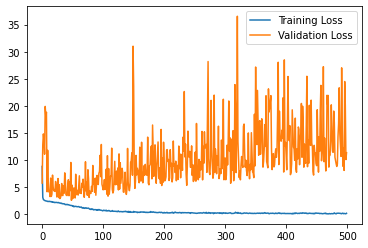

In [198]:
plt.figure()
plt.plot([i for i in range(nb_epochs)],fitted_model.history['loss'], label = "Training Loss")
plt.plot([i for i in range(nb_epochs)],fitted_model.history['val_loss'], label = "Validation Loss")
plt.legend()

In [199]:
def pred(image_path):
    image = Image.open(image_path)
    image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
    x = np.array(image)
    x = np.expand_dims(x,axis=0)
    c = np.argmax(model.predict(x), axis=1)
    l = os.listdir(DATASET_PATH + '/train')
    l.sort()
    return l[c[0]]


#pred(DATASET_PATH + '/train/Bug/accelgor.png')